<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Mínimos Cuadrados </i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M.en.C. César Carreon.</i></h5>
    <h5 align="center"><i>Ayudante: Jesús Iván Coss Calderón.</i></h5>
  <h5 align="center"><i>Materia: Análisis Numérico.</i></h5>
  </font>

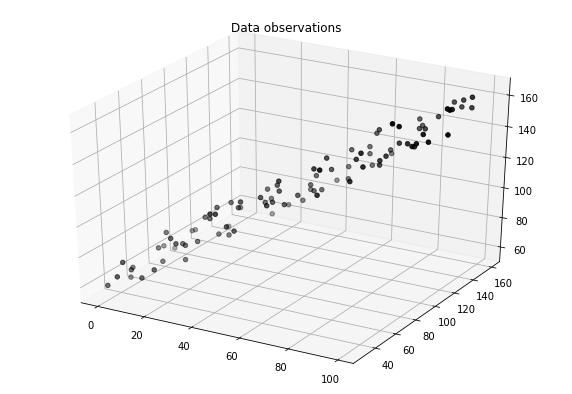

In [1]:
from mpl_toolkits import mplot3d
import random
import matplotlib.pyplot as plt
import numpy as np


 
def gen_data(n, bias, varianza):
    x = []
    y = []
    z = []
    for i in range(0, n):
        x.append(i)
        y.append((i + bias) + random.uniform(0, 1) * varianza)
        z.append((i + varianza) + random.uniform(0, 1) * bias)
        
    x=np.array(x); y=np.array(y); z=np.array(z)
    return x, y, z
 
x,y,fxy = gen_data(100, 25, 50)


# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x, y, fxy, color = "black")
plt.title("Data observations")

# show plot
plt.show()

In [2]:
class Invertion:
    ## A es un numpy array de dos dimensiones

    def __init__(self, A):
        self.A=A
    
    def Cholesky(self):
        n=self.A.shape[0]
        self.L=np.zeros_like(self.A)

        for k in range(n):
            for i in range(k+1):
                if k==i:
                    sum=0.0
                    for j in range(k):
                        sum+= self.L[k][j]*self.L[k][j]
                    self.L[k][k]=np.sqrt(self.A[k][k]-sum)

                else:
                    sum=0.0
                    for j in range(i):
                        sum+= self.L[i][j]*self.L[k][j]
                    self.L[k][i]=(self.A[k][i]-sum)/self.L[i][i]
        return self.L

In [3]:
class Sust:
	def __init__(self,L,U,b):
		self.L=L
		self.U=U
		self.b=b
		self.sustDelante()
		self.sustAtras()

	def sustDelante(self):
		n=len(self.L)
		self.y=np.empty_like(self.b)
		self.y[0] = self.b[0]/self.L[0][0]
		for i in range(1,n):
			self.y[i] = self.b[i]
			for j in range(0,i):
				self.y[i] -= self.L[i][j]*self.y[j]
			self.y[i] /= self.L[i][i]

	def sustAtras(self):
		n=len(self.U)
		self.x=np.empty_like(self.y)
		self.x[n-1] = self.y[n-1]/self.U[n-1][n-1]
		for i in range(n-2,-1,-1):
			self.x[i] = self.y[i]
			for j in range(i+1,n):
				self.x[i] -= self.U[i][j]*self.x[j]
			self.x[i] /= self.U[i][i]

	def get_Solve(self):
		return self.x

In [4]:
A=np.zeros((len(fxy),3))
A[:,0]=1.0
A[:,1]=x
A[:,2]=y

In [5]:
AT_A=A.T@A
AT_b=A.T@fxy

AT_A.shape

(3, 3)

In [6]:
AT_A

array([[1.00000000e+02, 4.95000000e+03, 1.00356737e+04],
       [4.95000000e+03, 3.28350000e+05, 5.82058394e+05],
       [1.00356737e+04, 5.82058394e+05, 1.11485145e+06]])

In [7]:
method=Invertion(AT_A)
L=method.Cholesky()
L

array([[  10.        ,    0.        ,    0.        ],
       [ 495.        ,  288.66070048,    0.        ],
       [1003.56736505,  295.47682793,  142.81960277]])

In [8]:
S=Sust(L,L.T,AT_b)
alpha,beta1,beta2=S.get_Solve()

In [9]:
alpha,beta1,beta2

(61.71537380446864, 0.9123029504637871, 0.038020027248156466)

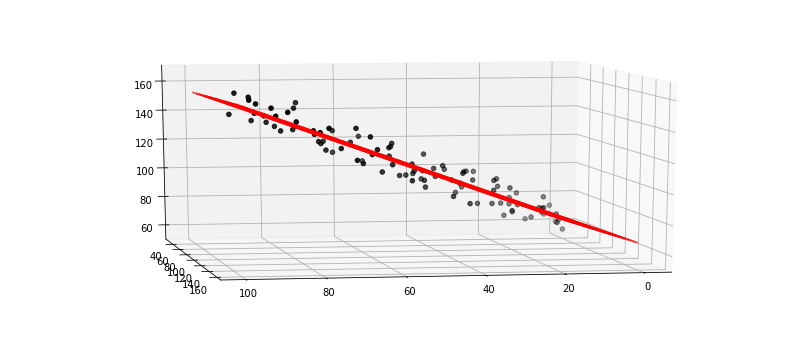

In [10]:
from mpl_toolkits.mplot3d import axes3d

figura = plt.figure(figsize=(14,6))
grafica = figura.add_subplot(111, projection='3d')

X,Y=np.meshgrid(x,y)
Z=beta2*Y + beta1*X +alpha

grafica.view_init(10, 80)
grafica.plot_wireframe(X,Y,Z,
                       color ='red',alpha=0.3)
grafica.scatter3D(x, y, fxy, color = "black")

## Referencias

*   http://matematicas.uis.edu.co/sites/default/files/paginas/archivos/Minimos%20Cuadrados%20%281%29.pdf
*   https://www.iartificial.net/regresion-lineal-con-ejemplos-en-python/#Aprendizaje_El_metodo_de_los_minimos_cuadrados
*   https://www.iartificial.net/gradiente-descendiente-para-aprendizaje-automatico/
*   Richard L. Burden, J. Douglas Faires, Análisis Numérico, Math Learning.
*   Yuri N. Skiba, Introducción a los Métodos Numéricos.
*   Riswan Butt, Numerical Analysys Using Matlab, Jones and Bartlett.
*   Ward Cheney, David Kincaid, Métodos Numéricos y Computación, Cenage Learning.
*   Justin Solomon: Numerical Algorithms.
*   Jaan Kiusalaas: Numerical Methods in Engineering with Python.
*   http://www.ehu.eus/izaballa/Ana_Matr/Apuntes/lec8.pdf
*   http://pcmap.unizar.es/~mpala/C_N_lecci/CN_1II2_SELdir.pdf